In [36]:
!cat /media/datos/Ejemplos/output_toggle.tpl

'cat' is not recognized as an internal or external command,
operable program or batch file.


# Introduction
---
This analysis is based on a loan datasheet of a lending club. Where we want to find what type of customer base, what is the customer behavior, which type of loan club gets most of there profit and some other factor to the for a loan.

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#define the base color
base_color = sns.color_palette()[0]

In [3]:
#load data set
data = pd.read_csv("clean_file.csv")

##### 1. What type of the customer base club’s have?

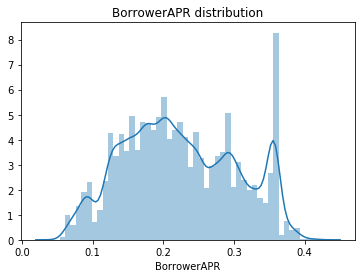

In [4]:
#BorrowerAPR rate
sns.distplot(data['BorrowerAPR'])
plt.title("BorrowerAPR distribution");

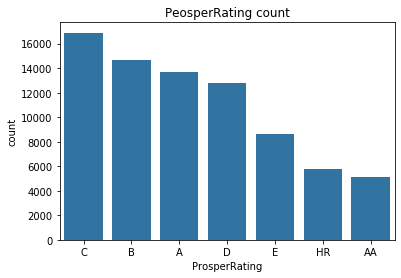

In [5]:
#ProsperRating plot
ProsperRating_order = data.ProsperRating.value_counts().index
sns.countplot(data=data, x="ProsperRating", color = base_color, order = ProsperRating_order);
plt.title("PeosperRating count");

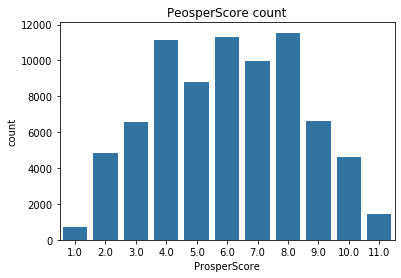

In [6]:
#ProsperScore plot
sns.countplot(data=data, x='ProsperScore', color=base_color);
plt.title("PeosperScore count");

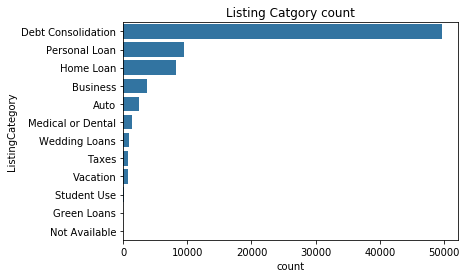

In [7]:
ListingCategory_order = data.ListingCategory.value_counts().index
sns.countplot(data=data, y='ListingCategory', color=base_color, order=ListingCategory_order);
plt.title("Listing Catgory count");

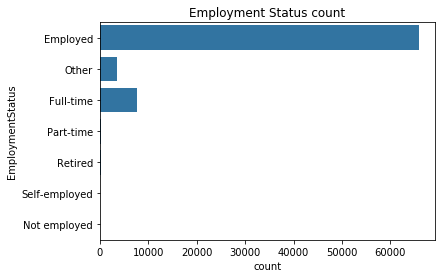

In [8]:
sns.countplot(data=data, y='EmploymentStatus', color = base_color);
plt.title("Employment Status count");

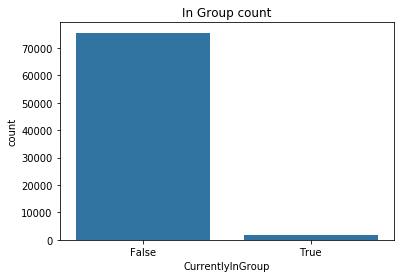

In [9]:
sns.countplot(data=data, x='CurrentlyInGroup', color = base_color);
plt.title("In Group count");

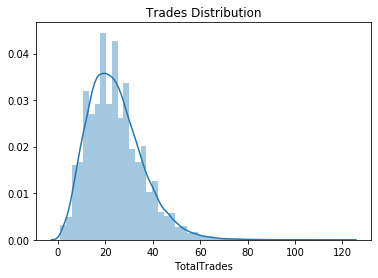

In [10]:
sns.distplot(data.TotalTrades);
plt.title("Trades Distribution");

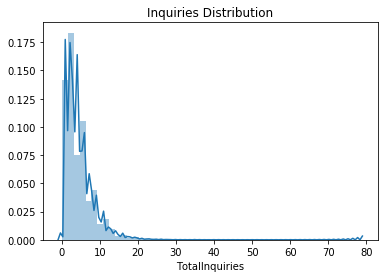

In [11]:
sns.distplot(data['TotalInquiries']);
plt.title("Inquiries Distribution");

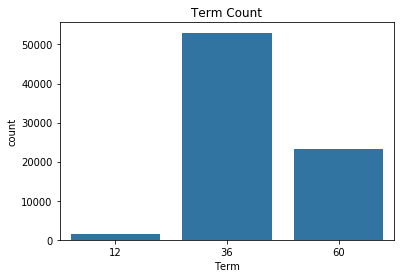

In [12]:
sns.countplot(data=data, x='Term', color = base_color);
plt.title("Term Count");

C:\Users\Naveen\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


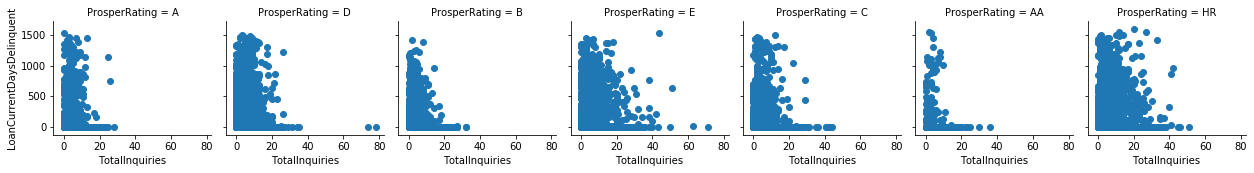

In [13]:
g = sns.FacetGrid(data = data, col='ProsperRating', size = 2.5,
                margin_titles = True)
g.map(plt.scatter, 'TotalInquiries', 'LoanCurrentDaysDelinquent');

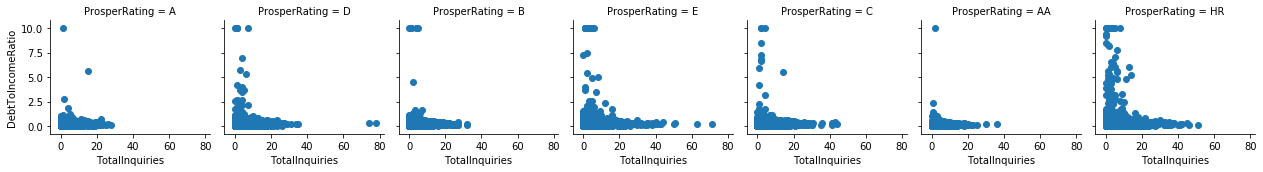

In [14]:
g = sns.FacetGrid(data = data, col='ProsperRating', size = 2.5,
                margin_titles = True)
g.map(plt.scatter, 'TotalInquiries', 'DebtToIncomeRatio');

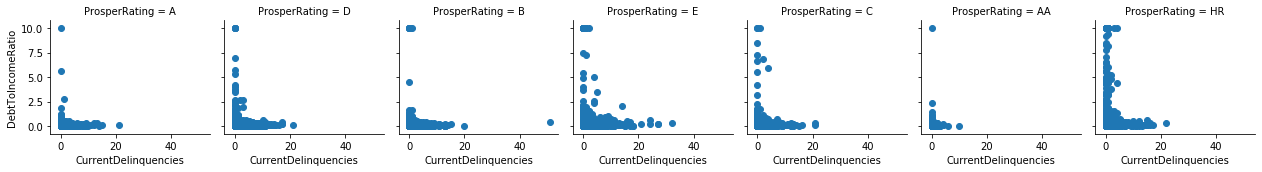

In [15]:
g = sns.FacetGrid(data = data, col='ProsperRating', size = 2.5,
                margin_titles = True)
g.map(plt.scatter, 'CurrentDelinquencies', 'DebtToIncomeRatio');

Club divided the customer in a few ProsperRatings. This rating shows the customer category based on the customer’s credit rating and other activities. Which decides whether to lend to the customer on not and if yes then on how much APR. The club has mostly targeted the customer who is in a debt loop and has the medium Prosper Scor and the customer wants the loans for Debt Consolidation and employment but the customer should not have more than 20 Inquiries or Credit lines. Also, customers should not have much debt to income ratio the upper limit for debt to income ratio is 10. Club majority lend to the peoples outside the group for 36 terms plan with an average APR of 0.10- 0.20.

##### 2. What is the customer behaviour?

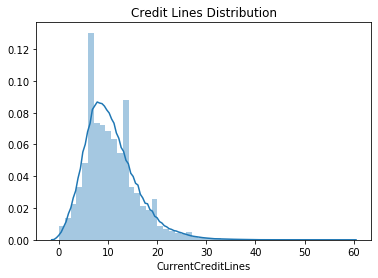

In [16]:
sns.distplot(data['CurrentCreditLines']);
plt.title("Credit Lines Distribution");

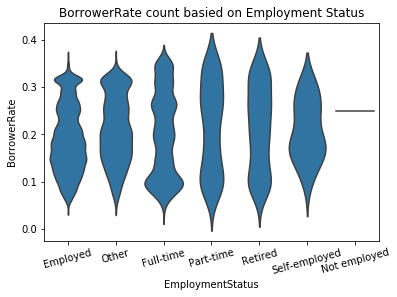

In [17]:
sns.violinplot(data=data, x="EmploymentStatus", y='BorrowerRate', inner = None, color = base_color)
plt.xticks(rotation = 15);
plt.title("BorrowerRate count basied on Employment Status");

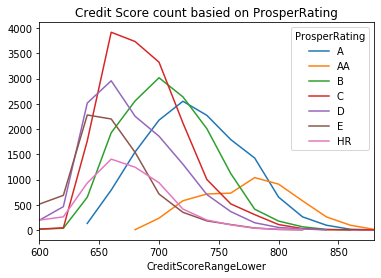

In [18]:
data.groupby(["ProsperRating"]).CreditScoreRangeLower.value_counts().unstack("ProsperRating").plot.line();
plt.title("Credit Score count basied on ProsperRating");

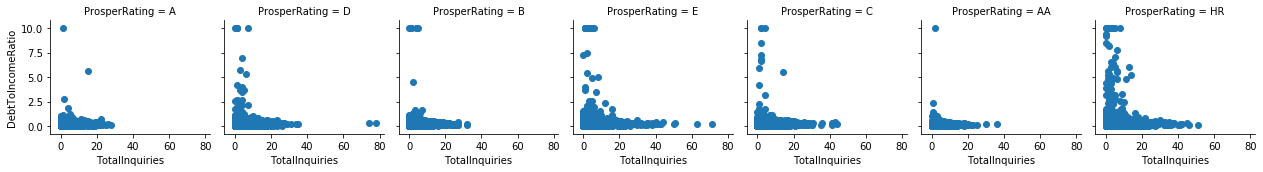

In [19]:
g = sns.FacetGrid(data = data, col='ProsperRating', size = 2.5,
                margin_titles = True)
g.map(plt.scatter, 'TotalInquiries', 'DebtToIncomeRatio');

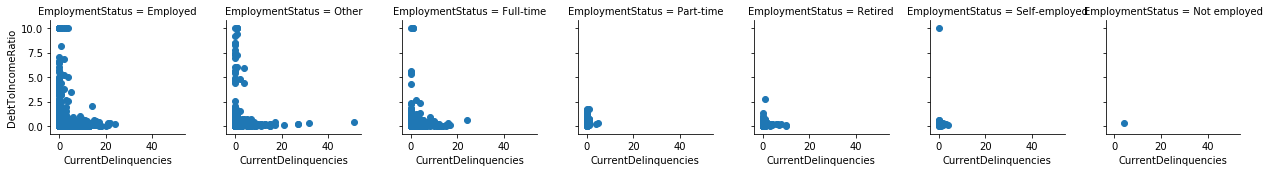

In [20]:
g = sns.FacetGrid(data = data, col='EmploymentStatus', size = 2.5,
                margin_titles = True)
g.map(plt.scatter, 'CurrentDelinquencies', 'DebtToIncomeRatio');

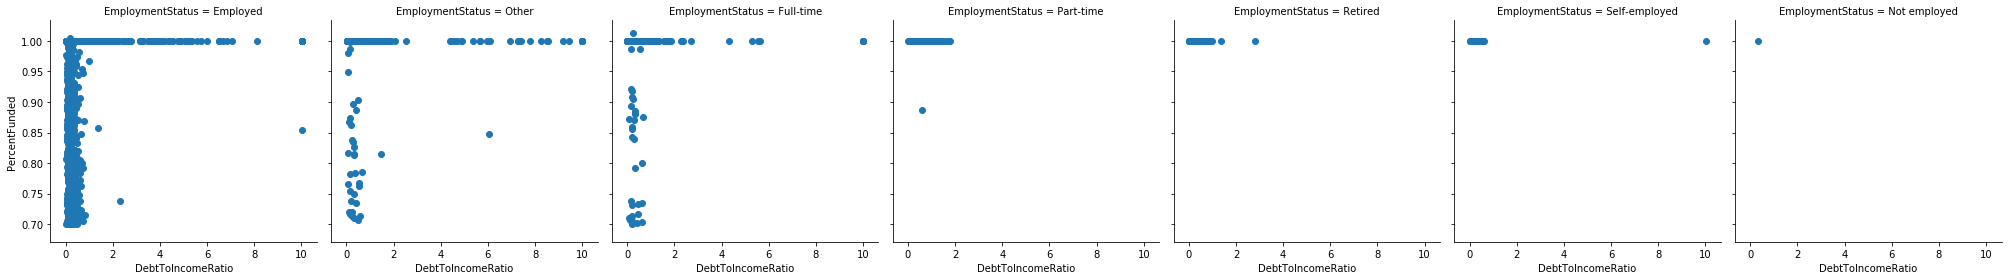

In [21]:
g = sns.FacetGrid(data = data, col='EmploymentStatus', size = 4,
                margin_titles = True)
g.map(plt.scatter, 'DebtToIncomeRatio', 'PercentFunded');

Most of the peoples which are in a debt loop have a high debt to income ratio and have fewer Delinquencies history. They tend to pay off their loan before the time period. They also have high Trading and Inquiry history. Which shows that they take the debt on a regular basis. These types of the customer will take the debt with any percentage of principle funding or Borrowing APR.

##### 3. Who give the most profit to the club?

In [22]:
data.LoanOriginationDate = pd.to_datetime(data.LoanOriginationDate)
data.ClosedDate= pd.to_datetime(data.ClosedDate)

In [23]:
data['loan_duartaion'] = data.ClosedDate - data.LoanOriginationDate

In [24]:
data.loc[data.ClosedDate.isna(), 'loan_duartaion'] = data.LoanOriginationDate.max() - data.loc[data.ClosedDate.isna(), 'LoanOriginationDate']

In [25]:
data['loan_duartaion'] = data['loan_duartaion'].apply(lambda x : int(x.days))

In [26]:
closed_loan = data[data.ClosedDate.notnull()]

In [27]:
closed_loan.loc[closed_loan.loan_duartaion//30.417 < closed_loan.Term, 'status'] = 'early'
closed_loan.loc[closed_loan.loan_duartaion//30.417 == closed_loan.Term, 'status'] = 'time'
closed_loan.loc[closed_loan.loan_duartaion//30.417 > closed_loan.Term, 'status'] = 'late'

C:\Users\Naveen\Anaconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Naveen\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


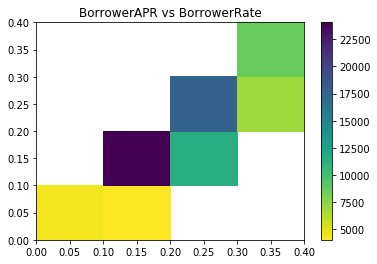

In [28]:
bins_x = np.arange(0, 0.5, 0.1)
bins_y = np.arange(0, 0.5, 0.1)
plt.hist2d(data = data, x = 'BorrowerAPR', y = 'BorrowerRate',
           bins = [bins_x, bins_y], cmap = 'viridis_r', cmin = 0.5)
plt.colorbar();
plt.title("BorrowerAPR vs BorrowerRate");

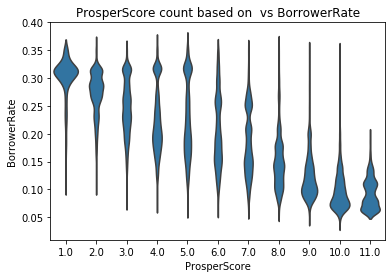

In [29]:
sns.violinplot(data=data, x="ProsperScore", y='BorrowerRate', inner = None, color = base_color);
plt.title("ProsperScore count based on  vs BorrowerRate");

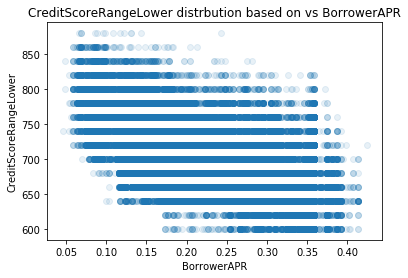

In [30]:
sns.regplot(data=data, x='BorrowerAPR', y='CreditScoreRangeLower', fit_reg = False, scatter_kws={'alpha' : 1/10});
plt.title("CreditScoreRangeLower distrbution based on vs BorrowerAPR");

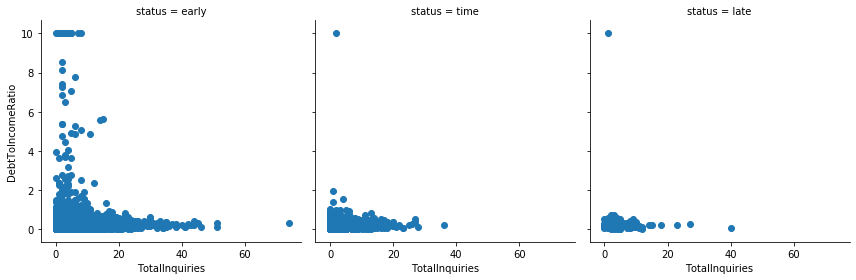

In [31]:
g = sns.FacetGrid(data = closed_loan, col='status', size = 4,
                margin_titles = True)
g.map(plt.scatter, 'TotalInquiries', 'DebtToIncomeRatio');

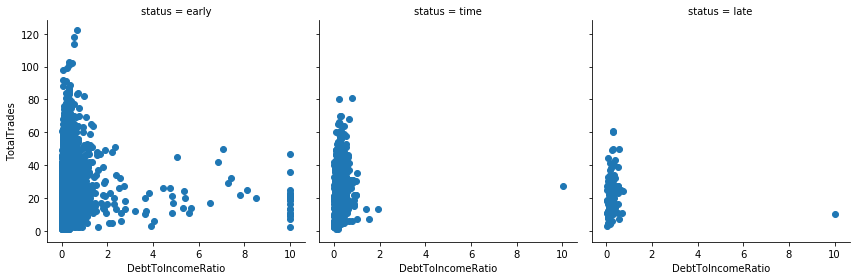

In [32]:
g = sns.FacetGrid(data = closed_loan, col='status', size = 4,
                margin_titles = True)
g.map(plt.scatter, 'DebtToIncomeRatio', 'TotalTrades');

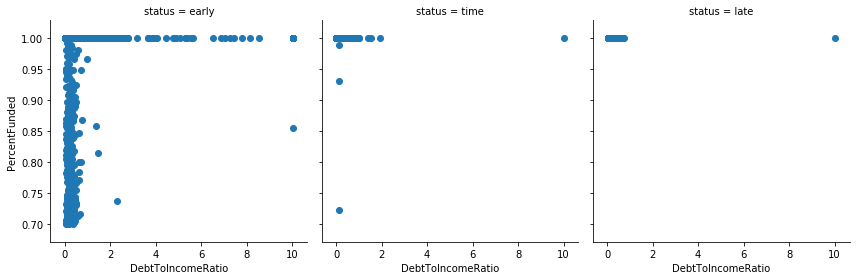

In [33]:
g = sns.FacetGrid(data = closed_loan, col='status', size = 4,
                margin_titles = True)
g.map(plt.scatter, 'DebtToIncomeRatio', 'PercentFunded');

Clubs get the most of there profit from the customer on how to have a high risk. Which means low credit score, high debt to income ratio, Employed customer. Because these customers have a habit of taking debt or in a debt loop who takes one loan to the pay the other loans and these types of customers can give the club high Borrowing Rate or APR and can leave a part of principle as processing fee.